**Non Linear Regression Notebook exercise pratice at Cognitive Class AI Machine Learning Online course**

**Non Linear Regression**
If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression. 

This exercise demonstrates Non-Linear regression using China's GDP datapoints from 1960-2014 (Source IBM)

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Non-linear regressions are a relationship between independent variable x and dependent variable y which result in a non-linear function modeled data. Any relation that is **NOT Linear** can be termed as non-linear, and is usually represented by the polynomial of *k* degrees (maximum power of x).

Non linear functions can have elements like exponentials, logrithmic, fractions etc.

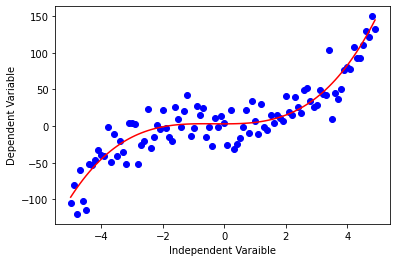

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) +3
y_noise = 20*np.random.normal(size=x.size)

ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Varaible')
plt.show()

Some other type of Non-linear functions are

### Quadratic

$$ Y = X^2 $$

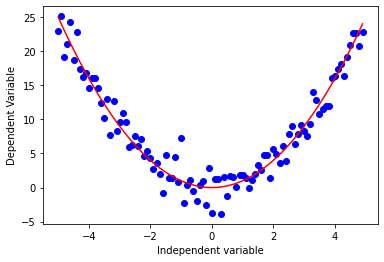

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2*np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent variable')
plt.show()

### Exponential 

$$ Y = a + bc^X $$

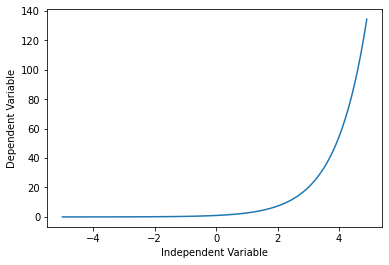

In [4]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.exp(X)

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


# Non-Linear Regression Example

In [5]:
import numpy as np
import pandas as pd

In [6]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv'
df = pd.read_csv(path)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting the Dataset

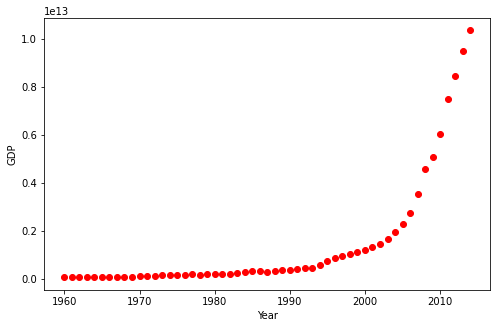

In [7]:
plt.figure(figsize = (8,5))

plt.plot(df[['Year']], df[['Value']], 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Data plot shows Logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing the growth in the middle, and then decreasing again at the end.

**Logistic Function Example**

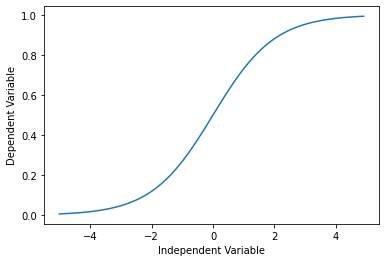

In [8]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

The formula for the Logistic Function is the following:
$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides teh curve on the x-axis.

### Building the Model

In [34]:
def sigmoid(x, Beta_1, Beta_2):
  y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
  return y

Test sigmoid function using beta_1, and beta_2 values

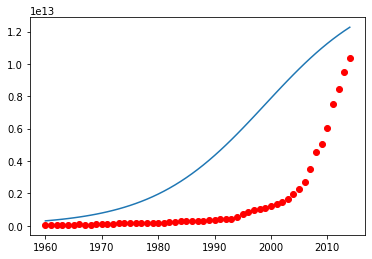

dtype('int64')

In [26]:
beta_1 = 0.10
beta_2 = 1999.0

x_data, y_data = df[['Year']].values, df[['Value']].values
y_pred = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()


In [29]:
# Lets normalize the data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

ydata.dtype

dtype('float64')

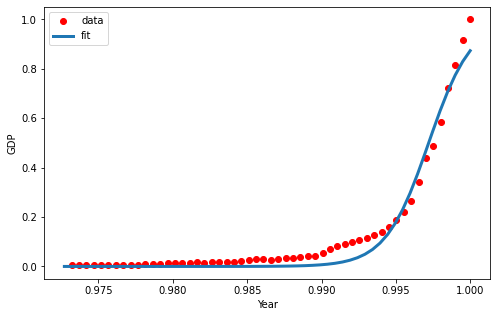

In [43]:
popt = [1,2]
popt[0] = 690.451715
popt[1] = 0.997207

x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize = (8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()